# <center> Linear Regression Model
**Summary of Actions**
* Custom RMSE evaluation metric on logged values
* A simlpe linear regression model
 

### Import Preliminaries

In [2]:
%matplotlib inline

# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

# Import data
train_df = pd.DataFrame(pd.read_csv(
    'https://www.dropbox.com/s/8ftdd4tejbmesy4/featured_train_df.csv?dl=1', index_col='Id'))
test_df = pd.DataFrame(pd.read_csv(
    'https://www.dropbox.com/s/h672z8790ehkxuj/featured_test_df.csv?dl=1', index_col='Id'))

# Set pandas options
pd.set_option('precision', 1)
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)
pd.set_option('precision', 3)

# List of dataframe
dfs = [train_df, test_df]

### DataFrame to Values

In [3]:
# Convert training and test data to values
X = train_df.loc[:, train_df.columns != 'SalePrice'].copy().values
y = train_df.SalePrice.values
X_test = test_df.values

### Fitting the Model 

In [4]:
# Creating and fitting the model
model = LinearRegression(fit_intercept=True)
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Predictions

In [5]:
# create predictions dataframe
predictions = pd.DataFrame(test_df.index)
saleprice = pd.DataFrame(model.predict(X_test),
                          columns=['SalePrice'])
predictions = pd.concat([predictions, saleprice],axis=1)

# View test predictions

In [6]:
# View training predictions
train_df_prediction = pd.DataFrame(model.predict(X), columns=['Pred SalePrice'])
train_df_prediction = train_df_prediction.set_index(train_df.index)
train_df_prediction = pd.concat([train_df['SalePrice'], train_df_prediction], axis=1)
train_df_prediction.sample(3)

,SalePrice,Pred SalePrice
Id,,
1166,233170.0,223424.640
834,167000.0,165087.459
340,155000.0,144257.489


### Residual Plot

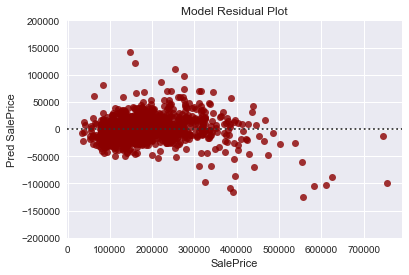

In [7]:
# Plotting training data residuals
residplot = sns.residplot(
    train_df.SalePrice, train_df_prediction['Pred SalePrice'], color='darkred')
plt.title('Model Residual Plot')
residplot.set(ylim=(-200000, 200000))
residplot

### Model Crossvalidation

In [8]:
# Creating list to store KFold scores
scores = list()

# Retrieve KFold scorse on test data, 10 folds
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    y_pred = pd.Series(model.predict(X_test))
    y_test = pd.Series(y_test)

    rmse = sqrt(mean_squared_error(np.log(y_test), np.log(np.abs(y_pred))))

    scores.append(rmse)

# Mean Logged RMSE Evaulation metric for our model
scores = pd.Series(scores, name='Scores')
print('Logged RMSE:', round(scores.mean(),4))

Logged RMSE: 0.7328


### Export Results

In [9]:
# Exporting data without index
predictions.to_csv('Submissions/lr_predicition.csv', index=False)

### Accuracy Scores

Feature Enginnering - RMSE: 0.1761

### Kaggle Scores

Feature Engineering - RMSE: 0.25602